# AST 502: Lecture 4: Maximum Likelihood Estimator
## Yujing Qin, Fall 2017, Chapter 4.5, 4.8, 4.9
Outline:
* Nonparametric methods
* Making a 1-d histogram
  * Choosing the optimal bin size
  * Estimating the histogram errors
* Correcting the selection function
  * Lynden-Bell's C-minus method
  * Simple case: bivariate Gaussian with selection function
  * Realistic example: galaxy luminosity function
* Addressing the uncertainty
  * Bootstrapping
  * Jackknifing

## Nonparametric methods

### What are nonparametric methods?

* Nonparametric $\neq$ parameter-free: always a few knobs to turn!
* Nonparametric methods make no (or very little) assumption about the "true" distribution $h(x)$

### Why nonparametric?

When there is no motivation to use a parametric method.

Nonparametric methods allow more flexibility.

## Making a 1-d histogram
### Choosing the right bin size: a bad\* example

---
_\* This is not a criticism towards the paper itself_

In [21]:
%matplotlib
import numpy as np
X = np.random.normal(size=300)
N_bins = int(8. / (3.5 * np.std(X) / np.power(X.size, 1. / 3)))
print N_bins
fig = plt.figure(figsize=(12., 4.))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(X, bins=N_bins / 2, range=(-4., 4.))
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(X, bins=N_bins, range=(-4., 4.))
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(X, bins=N_bins * 2, range=(-4., 4.))

Using matplotlib backend: MacOSX
14


(array([  0.,   0.,   0.,   1.,   1.,   1.,   4.,   6.,  10.,  12.,  12.,
         32.,  35.,  29.,  31.,  27.,  31.,  26.,  13.,  12.,   7.,   4.,
          2.,   2.,   1.,   1.,   0.,   0.]),
 array([-4.        , -3.71428571, -3.42857143, -3.14285714, -2.85714286,
        -2.57142857, -2.28571429, -2.        , -1.71428571, -1.42857143,
        -1.14285714, -0.85714286, -0.57142857, -0.28571429,  0.        ,
         0.28571429,  0.57142857,  0.85714286,  1.14285714,  1.42857143,
         1.71428571,  2.        ,  2.28571429,  2.57142857,  2.85714286,
         3.14285714,  3.42857143,  3.71428571,  4.        ]),
 <a list of 28 Patch objects>)

## Making a 1-d histogram
### Choosing the optimal bin size: Scott's rule & Freedman-Diaconis rule

The optimal bin size should be:

* Proportional to the scale ("width") of distribution,
* Decreasing with the sample size.

**Scott's rule**

Assuming Gaussian distribution, Scott's rule suggests a bin size of

$$ \Delta_b = \frac{3.5\sigma}{N^{1/3}}$$

which asymptotically minimizes the mean integrated square error (MISE):

$$\text{MISE} = \int_{\infty}^{\infty} [f(x) - h(x)]^2 dx$$

**Freedman-Diaconis rule**

This is a generalization of Scott's rule to non-Gaussian distribution.

$$ \Delta_b = \frac{2(q_{75} - q_{25})}{N^{1/3}} = \frac{2.7\sigma}{N^{1/3}}$$

---
For Gaussian distribution, note the difference of the coefficients!

In [25]:
%matplotlib
import numpy as np
from astroML.plotting import hist
N_pts = 1000
X = np.random.normal(size=N_pts)
plt.subplot(1, 2, 1)
hist(X, bins='scott')
plt.title("Scott's rule")
plt.subplot(1, 2, 2)
hist(X, bins='freedman')
plt.title("Freedman's rule")

Using matplotlib backend: MacOSX


## Making a 1-d histogram
### Estimating the histogram errors

For a histogram of $N$ data points, with a bin size of $\Delta_b$, the normalized density of bin $k$ is

$$ f_k = \frac{n_k}{\Delta_b N} $$

where $n_k$ is the counts in this bin.

The uncertainty of $f_k$ is

$$ \sigma_k = \frac{\sqrt{n_k}}{\Delta_b N} $$

This approach assumes Gaussian distribution of $n_k$, which is valid only when $n_k$ is large enough.

## Correcting the selection function
### Selection function:

Selection function $\neq$ the "true" distribution

Selection effect is induced by the observational / sampling process

**Strict 1-d case**: we can use $S(x)$ to correct the estimate $f(x)$

$$h(x) = \frac{f(x)}{S(x)}$$

** Multivariate case **: more complex, can be correlated.

Example: the Malmquist bias.

## Correcting the selection function
### Lynden-Bell's C-minus method
The C-minus method is based on the assumption that the bivariate distribution $n(x,y)$ is separable (i.e. uncorrelated $x$ and $y$):

$$ n(x, y) = \Psi(x) \rho(y)$$

To test this assumption, we define a _comparable_ or _associated_ set $J_i$ for **each** data point $(x_i, y_i)$, so that

$$J_i = \{j: x_j < x_i \text{ and } y_j < y_{max}(x_i) \}$$

$J_i$ is a set of $N_i$ elements. It is the **largest** $x$-limited and $y_{max}$-limited subset.

Sort $J_i$ by $y_j$, we have the rank of each element $R_j$ (from 1 to $N_i$). The rank $R_i$ is the object $i$ in **its own** associated set.

$R_i$ equals the number of elements in $J_i$ with $y<y_i$. If $x$ and $y$ are independent, $R_i$ should distribute **uniformly** between $0$ and $N_i$.

The expectation and variance for $R_i$ are $E(R_i) = E_i = N_i / 2$, $V(R_i) = V_i = N_i^2 / 12$. Let's define the statistic

$$\tau = \frac{\Sigma_i (R_i - E_i)}{\sqrt{\Sigma_i V_i}}$$

$\tau < 1$ indicates that $x$ and $y$ are uncorrelated at 1-$\sigma$ level

![Ivezic, Figure 4.8](http://www.astroml.org/_images/fig_lyndenbell_setup_1.png)

## Correcting the selection function
### Lynden-Bell's C-minus method
The cumulative distribution of $x$ is:

$$ \Phi(x) = \int_{-\infty}^{x} \Psi(x') \, dx'$$

Then assuming $x_i$ are sorted,

$$ \Phi(x_i) = \Phi(x_1) \prod_{k = 2}^{i} (1 + 1 / N_k) $$

Similarly, the cumulative distribution for $y$ is

$$\Sigma(y) = \int_{-\infty}^{y} \rho(y') \, dy'$$

Let's define $M_k$ as number of objects in $J_k = \{j:y_j < y_k\text{ and }y_{max}(x_j) > y_k\}$, thus we have

$$ \Sigma(y_i) = \Sigma(y_i) \prod_{k = 2}^{i} (1 + 1 / M_k) $$

## Correcting the selection function
### Simple case: bivariate Gaussian distribution


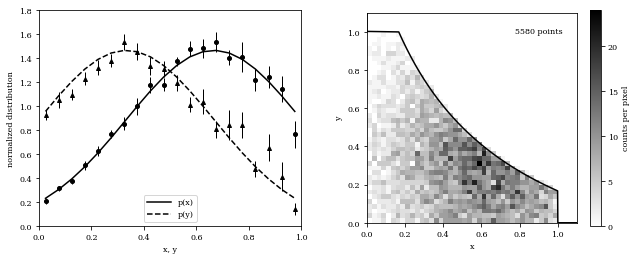

In [4]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from astroML.lumfunc import bootstrap_Cminus

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define and sample our distributions
N = 10000
np.random.seed(42)

# Define the input distributions for x and y
x_pdf = stats.truncnorm(-2, 1, 0.66666, 0.33333)
y_pdf = stats.truncnorm(-1, 2, 0.33333, 0.33333)

x = x_pdf.rvs(N)
y = y_pdf.rvs(N)

# define the truncation: we'll design this to be symmetric
# so that xmax(y) = max_func(y)
# and ymax(x) = max_func(x)
max_func = lambda t: 1. / (0.5 + t) - 0.5

xmax = max_func(y)
xmax[xmax > 1] = 1  # cutoff at x=1

ymax = max_func(x)
ymax[ymax > 1] = 1  # cutoff at y=1

# truncate the data
flag = (x < xmax) & (y < ymax)
x = x[flag]
y = y[flag]
xmax = xmax[flag]
ymax = ymax[flag]

x_fit = np.linspace(0, 1, 21)
y_fit = np.linspace(0, 1, 21)

#------------------------------------------------------------
# compute the Cminus distributions (with bootstrap)
x_dist, dx_dist, y_dist, dy_dist = bootstrap_Cminus(x, y, xmax, ymax,
                                                    x_fit, y_fit,
                                                    Nbootstraps=20,
                                                    normalize=True)

x_mid = 0.5 * (x_fit[1:] + x_fit[:-1])
y_mid = 0.5 * (y_fit[1:] + y_fit[:-1])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(bottom=0.2, top=0.95,
                    left=0.1, right=0.92, wspace=0.25)

# First subplot is the true & inferred 1D distributions
ax = fig.add_subplot(121)
ax.plot(x_mid, x_pdf.pdf(x_mid), '-k', label='p(x)')
ax.plot(y_mid, y_pdf.pdf(y_mid), '--k', label='p(y)')
ax.legend(loc='lower center')

ax.errorbar(x_mid, x_dist, dx_dist, fmt='ok', ecolor='k', lw=1, ms=4)
ax.errorbar(y_mid, y_dist, dy_dist, fmt='^k', ecolor='k', lw=1, ms=4)

ax.set_ylim(0, 1.8)
ax.set_xlim(0, 1)
ax.set_xlabel('x, y')
ax.set_ylabel('normalized distribution')

# Second subplot is the "observed" 2D distribution
ax = fig.add_subplot(122)
H, xb, yb = np.histogram2d(x, y, bins=np.linspace(0, 1, 41))
plt.imshow(H.T, origin='lower', interpolation='nearest',
           extent=[0, 1, 0, 1], cmap=plt.cm.binary)
cb = plt.colorbar()

x_limit = np.linspace(-0.1, 1.1, 1000)
y_limit = max_func(x_limit)
x_limit[y_limit > 1] = 0
y_limit[x_limit > 1] = 0
ax.plot(x_limit, y_limit, '-k')

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
cb.set_label('counts per pixel')
ax.text(0.93, 0.93, '%i points' % len(x), ha='right', va='top',
        transform=ax.transAxes)

plt.show()

![Ivezic, Figure 4.9](http://www.astroml.org/_images/fig_lyndenbell_toy_1.png)

## Correcting the selection function
### Realistic case: galaxy luminosity function

[========================================]  114.85Mb / 114.85Mb   
114152 red galaxies
45010 blue galaxies
('- computing bootstrapped luminosity function ', 'for 114152 points')
('- computing bootstrapped luminosity function ', 'for 45010 points')


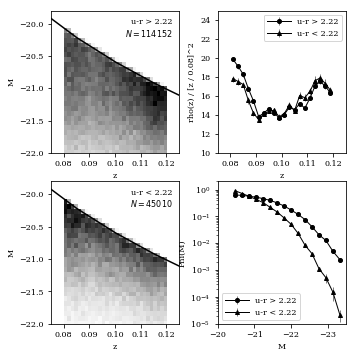

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import os
import numpy as np
from matplotlib import pyplot as plt

from scipy import interpolate, stats

from astroML.lumfunc import binned_Cminus, bootstrap_Cminus
from astroML.cosmology import Cosmology
from astroML.datasets import fetch_sdss_specgals

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Get the data and perform redshift/magnitude cuts
data = fetch_sdss_specgals()

z_min = 0.08
z_max = 0.12
m_max = 17.7

# redshift and magnitude cuts
data = data[data['z'] > z_min]
data = data[data['z'] < z_max]
data = data[data['petroMag_r'] < m_max]

# divide red sample and blue sample based on u-r color
ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

# truncate sample (optional: speeds up computation)
#data_red = data_red[::10]
#data_blue = data_blue[::10]
print data_red.size, "red galaxies"
print data_blue.size, "blue galaxies"

#------------------------------------------------------------
# Distance Modulus calculation:
#  We need functions approximating mu(z) and z(mu)
#  where z is redshift and mu is distance modulus.
#  We'll accomplish this using the cosmology class and
#  scipy's cubic spline interpolation.
cosmo = Cosmology()
z_sample = np.linspace(0.01, 1.5, 100)
mu_sample = [cosmo.mu(z) for z in z_sample]
mu_z = interpolate.interp1d(z_sample, mu_sample)
z_mu = interpolate.interp1d(mu_sample, z_sample)

data = [data_red, data_blue]
titles = ['u-r > 2.22', 'u-r < 2.22']
markers = ['o', '^']
archive_files = ['lumfunc_red.npz', 'lumfunc_blue.npz']


def compute_luminosity_function(z, m, M, m_max, archive_file):
    """Compute the luminosity function and archive in the given file.

    If the file exists, then the saved results are returned.
    """
    Mmax = m_max - (m - M)
    zmax = z_mu(m_max - M)

    if not os.path.exists(archive_file):
        print ("- computing bootstrapped luminosity function ",
               "for %i points" % len(z))

        zbins = np.linspace(0.08, 0.12, 21)
        Mbins = np.linspace(-24, -20.2, 21)
        dist_z, err_z, dist_M, err_M = bootstrap_Cminus(z, M, zmax, Mmax,
                                                        zbins, Mbins,
                                                        Nbootstraps=20,
                                                        normalize=True)
        np.savez(archive_file,
                 zbins=zbins, dist_z=dist_z, err_z=err_z,
                 Mbins=Mbins, dist_M=dist_M, err_M=err_M)
    else:
        print "- using precomputed bootstrapped luminosity function results"
        archive = np.load(archive_file)
        zbins = archive['zbins']
        dist_z = archive['dist_z']
        err_z = archive['err_z']
        Mbins = archive['Mbins']
        dist_M = archive['dist_M']
        err_M = archive['err_M']

    return zbins, dist_z, err_z, Mbins, dist_M, err_M


#------------------------------------------------------------
# Perform the computation and plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.13, right=0.95, wspace=0.3,
                    bottom=0.08, top=0.95, hspace=0.2)

for i in range(2):
    m = data[i]['petroMag_r']
    z = data[i]['z']
    M = m - mu_z(z)

    # compute the luminosity function for the given subsample
    zbins, dist_z, err_z, Mbins, dist_M, err_M = \
        compute_luminosity_function(z, m, M, m_max, archive_files[i])

    #------------------------------------------------------------
    # First axes: plot the observed 2D distribution of (z, M)
    ax = fig.add_subplot(2, 2, 1 + 2 * i)
    H, xbins, ybins = np.histogram2d(z, M, bins=(np.linspace(0.08, 0.12, 31),
                                                 np.linspace(-23, -20, 41)))
    ax.imshow(H.T, origin='lower', aspect='auto',
              interpolation='nearest', cmap=plt.cm.binary,
              extent=(xbins[0], xbins[-1], ybins[0], ybins[-1]))

    # plot the cutoff curve
    zrange = np.linspace(0.07, 0.13, 100)
    Mmax = m_max - mu_z(zrange)
    ax.plot(zrange, Mmax, '-k')

    ax.text(0.95, 0.95, titles[i] + "\n$N = %i$" % len(z),
            ha='right', va='top',
            transform=ax.transAxes)

    ax.set_xlim(0.075, 0.125)
    ax.set_ylim(-22, -19.8)
    ax.set_xlabel('z')
    ax.set_ylabel('M')

    #------------------------------------------------------------
    # Second axes: plot the inferred 1D distribution in z
    ax2 = fig.add_subplot(2, 2, 2)
    factor = 0.08 ** 2 / (0.5 * (zbins[1:] + zbins[:-1])) ** 2
    ax2.errorbar(0.5 * (zbins[1:] + zbins[:-1]),
                 factor * dist_z, factor * err_z,
                 fmt='-k' + markers[i], ecolor='gray', lw=1, ms=4,
                 label=titles[i])

    #------------------------------------------------------------
    # Third axes: plot the inferred 1D distribution in M
    ax3 = fig.add_subplot(224, yscale='log')

    # truncate the bins so the plot looks better
    Mbins = Mbins[3:-1]
    dist_M = dist_M[3:-1]
    err_M = err_M[3:-1]

    ax3.errorbar(0.5 * (Mbins[1:] + Mbins[:-1]), dist_M, err_M,
                 fmt='-k' + markers[i], ecolor='gray', lw=1, ms=4,
                 label=titles[i])

#------------------------------------------------------------
# set labels and limits
ax2.legend(loc=1)
ax2.xaxis.set_major_locator(plt.MultipleLocator(0.01))
ax2.set_xlabel(r'z')
ax2.set_ylabel(r'rho(z) / [z / 0.08]^2')
ax2.set_xlim(0.075, 0.125)
ax2.set_ylim(10, 25)

ax3.legend(loc=3)
ax3.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax3.set_xlabel(r'M')
ax3.set_ylabel(r'Phi(M)')
ax3.set_xlim(-20, -23.5)
ax3.set_ylim(1E-5, 2)

plt.show()

![Ivezic, Figure 4.10](http://www.astroml.org/_images/fig_lyndenbell_gals_1.png)

## Addressing the uncertainty

** Why bootstrapping & Jackkniffing? **

* Available parametric methods are based on unfavorable strong assumptions,
* No available parametric methods for the problem,
* The procedure to find the statistic is complex and non-trivial,
* Dataset itself is complicated (correlations, truncated / censored),

### Bootstrapping

We approximate the "real" distribution $h(x)$ with an estimate $f(x)$. By drawing multiple samples from $f(x)$, we can estimate the "dispersions" (i.e. uncertainties) of any derived quantities. The bootstrapping method is based on the assumption that

$$ f(x) = \frac{1}{N} \sum_{i = 1}^{N} \delta(x - x_i) $$

i.e. a collection of $\delta$ functions (nonparametric bootstraping).

We draw samples (size $N$) from this $f(x)$ **with** replacements. The chance of getting identical sample is very low ($N!/N^n$).

Similarly, we can draw samples from a parametric estimate of $h(x)$ (parametric bootstrapping).

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.resample import bootstrap
from astroML.stats import sigmaG

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

m = 1000  # number of points
n = 10000  # number of bootstraps

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute bootstrap resamplings of data
mu1_bootstrap = bootstrap(data, n,  np.std, kwargs=dict(axis=1, ddof=1))
mu2_bootstrap = bootstrap(data, n, sigmaG, kwargs=dict(axis=1))

#------------------------------------------------------------
# Compute the theoretical expectations for the two distributions
x = np.linspace(0.8, 1.2, 1000)

sigma1 = 1. / np.sqrt(2 * (m - 1))
pdf1 = norm(1, sigma1).pdf(x)

sigma2 = 1.06 / np.sqrt(m)
pdf2 = norm(1, sigma2).pdf(x)

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5, 3.75))

ax.hist(mu1_bootstrap, bins=50, normed=True, histtype='step',
        color='blue', ls='dashed', label=r'sigma (std. dev.)')
ax.plot(x, pdf1, color='gray')

ax.hist(mu2_bootstrap, bins=50, normed=True, histtype='step',
        color='red', label=r'sigma_G (quartile)$')
ax.plot(x, pdf2, color='gray')

ax.set_xlim(0.82, 1.18)

ax.set_xlabel(r'sigma')
ax.set_ylabel(r'p(sigma|x,I)')

ax.legend()

plt.show()

![Ivezic, Figure 4.10](http://www.astroml.org/_images/fig_bootstrap_gaussian_1.png)

## Addressing the uncertainty
### Jackkniffing

Jackniffing is based on the idea of **taking away** data points from the sample. To estimate the uncertainty of a statistics $\alpha$, assuming the value calculated from the entire sample is $\alpha_N$. After removing a data point $i$, the calculated statistic is $\alpha_i^*$. A bias-corrected estimate of $\alpha$ writes

$$ \alpha_J = \alpha_N + \Delta \alpha $$

where the correction term is

$$ \Delta \alpha = (N - 1) \left( \alpha_N - \frac{1}{N} \sum_{i = 1}^{N} \alpha_i^* \right) $$

If the estimator is asymptotically normal,

$$ \sigma_{\alpha} = \sqrt{ \frac{1}{N(N-1)} \sum_{i=1}^N [N \alpha_N - \alpha_J - (N - 1)\alpha_i^* ]^2 } $$

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
m = 1000  # number of points
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute jackknife resamplings of data
from astroML.resample import jackknife
from astroML.stats import sigmaG

# mu1 is the mean of the standard-deviation-based width
mu1, sigma_mu1, mu1_raw = jackknife(data, np.std,
                                    kwargs=dict(axis=1, ddof=1),
                                    return_raw_distribution=True)

pdf1_theory = norm(1, 1. / np.sqrt(2 * (m - 1)))
pdf1_jackknife = norm(mu1, sigma_mu1)

# mu2 is the mean of the interquartile-based width
#  WARNING: do not use the following in practice.  This example
#           shows that jackknife fails for rank-based statistics.
mu2, sigma_mu2, mu2_raw = jackknife(data, sigmaG,
                                    kwargs=dict(axis=1),
                                    return_raw_distribution=True)
pdf2_theory = norm(data.std(), 1.06 / np.sqrt(m))
pdf2_jackknife = norm(mu2, sigma_mu2)
print mu2, sigma_mu2

#------------------------------------------------------------
# plot the results
print "mu_1 mean: %.2f +- %.2f" % (mu1, sigma_mu1)
print "mu_2 mean: %.2f +- %.2f" % (mu2, sigma_mu2)

fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax = fig.add_subplot(121)
ax.hist(mu1_raw, np.linspace(0.996, 1.008, 100),
        label=r'sigma^* (std.\ dev.)',
        histtype='stepfilled', fc='white', normed=False)
ax.hist(mu2_raw, np.linspace(0.996, 1.008, 100),
        label=r'sigma_G^* (quartile)$',
        histtype='stepfilled', fc='gray', normed=False)
ax.legend(loc='upper left', handlelength=2)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.004))
ax.set_xlabel(r'sigma^*')
ax.set_ylabel(r'N(sigma^*')
ax.set_xlim(0.998, 1.008)
ax.set_ylim(0, 550)

ax = fig.add_subplot(122)
x = np.linspace(0.45, 1.15, 1000)
ax.plot(x, pdf1_jackknife.pdf(x),
        color='blue', ls='dashed', label=r'sigma (std.\ dev.)',
        zorder=2)
ax.plot(x, pdf1_theory.pdf(x), color='gray', zorder=1)
ax.plot(x, pdf2_jackknife.pdf(x),
        color='red', label=r'sigma_G (quartile)', zorder=2)
ax.plot(x, pdf2_theory.pdf(x), color='gray', zorder=1)
plt.legend(loc='upper left', handlelength=2)

ax.set_xlabel(r'sigma')
ax.set_ylabel(r'p(sigma|x,I)')
ax.set_xlim(0.45, 1.15)
ax.set_ylim(0, 24)

plt.show()

![Ivezic, Figure 4.10](http://www.astroml.org/_images/fig_jackknife_gaussian_1.png)